In [94]:
import sys

sys.path.insert(0, "python")

import numpy as np

from auxiliary import plot_crude_zero_probability
from auxiliary import plot_smoothed_probability
from auxiliary import plot_crude_step_function

## Setup

We are working with the example of a Probit model and thus specify a function that returns the alternative-specific utilities and draws the chocks from a normal distribution.

In [28]:
def get_utility(intercept, eps_draws):
    return intercept + eps_draws

def get_shocks(num_draws, seed=123):
    np.random.seed(seed)
    eps_draws = np.random.normal(size=(num_draws, 2))
    return eps_draws

## Crude accept - reject simulator

We first show how the choice probability is a step function of the model parameters.

In [68]:
num_draws = 1000
eps_draws = get_shocks(num_draws)

shifts = np.linspace(-0.01, 0.01, 100)

probs = list()
for shift in shifts:
    
    intercepts = np.tile(0.0, (num_draws, 2))
    intercepts[:, 0] = shift
    
    prob = (get_utility(intercepts, eps_draws)[:, 0] > 0).sum() / num_draws

    probs.append(prob)

Now we are ready to inspect the results.

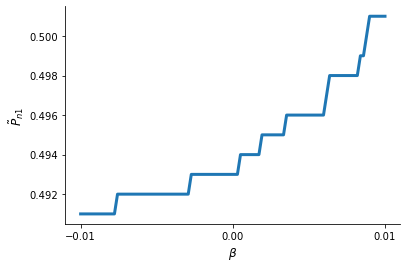

In [69]:
plot_crude_step_function(shifts, probs)

In [62]:
num_draws = np.linspace(100, 10000, 100, dtype=int)

probs = list()
for draws in num_draws:

    eps_draws = get_shocks(draws)

    levels = np.tile(0.0, (draws, 2))
    levels[:, 0] = -3

    prob = (get_utility(levels, eps_draws)[:, 0] > 0).sum() / draws
    probs.append(prob)

Let's have a look at how many simulation draws a required to generate a nonzero probability.

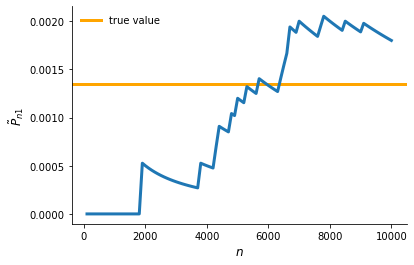

In [63]:
plot_crude_zero_probability(num_draws, probs)

## Smoothed accept - reject simulator

We need to create a function that computes the smoothed probabilities. We set the intercept of the oalterantive and both shocks to zero and then trace out the smoothed probability for varying intercept of the first choice.

In [100]:
def get_smoothed_indicator(levels, lambda_):
    return np.exp(levels[:, 0] / lambda_) / np.exp(levels / lambda_).sum(axis=1)

Now we just evaluate this function over a grid to assess the impact of the smoothing parameter.

In [101]:
num_draws = 1000
levels = np.tile(0.0, (num_draws, 2))
levels[:, 0] = np.linspace(-0.05, 0.05, num_draws)

rslts = dict()
for lambda_ in [0.001, 0.01, 0.02]:
    rslts[lambda_] = get_smoothed_indicator(levels, lambda_)

Let's look at the results.

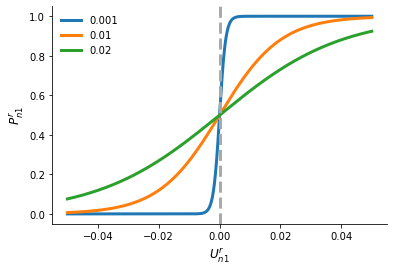

In [102]:
plot_smoothed_probability(levels, rslts)